<a href="https://colab.research.google.com/github/mesushan/Credit-Card-Fraud-Detection/blob/master/credit_card_fraud_detection_using_deep_neural_network_with_undersampling_and_oversampling_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link to dataset in Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)

### Dependecies and importing libraries

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
np.random.seed(2)

Using TensorFlow backend.


### Importing dataset from google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/creditcard.csv')

### Data Exploration

In [0]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Pre-Processing

In [0]:
#normalization
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)

In [0]:
data = data.drop(['Time'], axis=1)

In [0]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [0]:
#splitting data into dependent(input) and independent(output) variables
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [0]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [0]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [0]:
#splitting dataset into training and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [0]:
X_train.shape

(199364, 29)

In [0]:
X_test.shape

(85443, 29)

In [0]:
#transform dataset in numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Deep neural network

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [0]:
model = Sequential([
    Dense(units=16, input_dim = 29, activation='relu'),
    Dense(units = 24, activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

### Training the model

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Train on 199364 samples
Epoch 1/5
199364/199364 [==============================] - 30s 149us/sample - loss: 0.0112 - accuracy: 0.9969
Epoch 2/5
199364/199364 [==============================] - 30s 152us/sample - loss: 0.0041 - accuracy: 0.9993
Epoch 3/5
199364/199364 [==============================] - 29s 146us/sample - loss: 0.0037 - accuracy: 0.9993
Epoch 4/5
199364/199364 [==============================] - 30s 150us/sample - loss: 0.0035 - accuracy: 0.9993
Epoch 5/5
199364/199364 [==============================] - 30s 151us/sample - loss: 0.0034 - accuracy: 0.9994


In [0]:
#model evaluation
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 3s 36us/sample - loss: 0.0041 - accuracy: 0.9994


### Testing the model

In [0]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

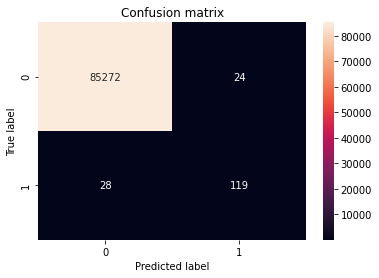

In [0]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.xlim(0,2)
plt.ylim(2,0)
plt.show()

In [0]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.83      0.81      0.82       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



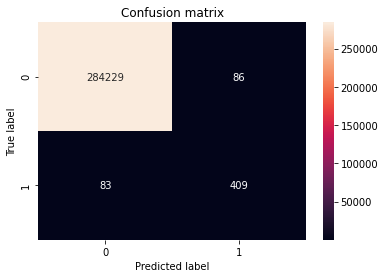

In [0]:
#confusion matrix for whole dataset
y_predict = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_predict.round())
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.xlim(0,2)
plt.ylim(2,0)
plt.show()


In [0]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_expected, y_predict.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.83      0.83      0.83       492

    accuracy                           1.00    284807
   macro avg       0.91      0.92      0.91    284807
weighted avg       1.00      1.00      1.00    284807



### Undersampling

In [0]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [0]:
normal_indices = data[data.Class == 0].index

In [0]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [0]:
#creating under sample dataset
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [0]:
under_sample_data = data.iloc[under_sample_indices,:]

In [0]:
#splitting dataset into input and output (dependent and independent varibales simultaneously)
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [0]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [0]:
#transforming dataset to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [0]:
#training the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Train on 688 samples
Epoch 1/5
688/688 [==============================] - 1s 735us/sample - loss: 0.4081 - accuracy: 0.9157
Epoch 2/5
688/688 [==============================] - 0s 140us/sample - loss: 0.1842 - accuracy: 0.9331
Epoch 3/5
688/688 [==============================] - 0s 149us/sample - loss: 0.1687 - accuracy: 0.9360
Epoch 4/5
688/688 [==============================] - 0s 149us/sample - loss: 0.1458 - accuracy: 0.9491
Epoch 5/5
688/688 [==============================] - 0s 153us/sample - loss: 0.1286 - accuracy: 0.9520


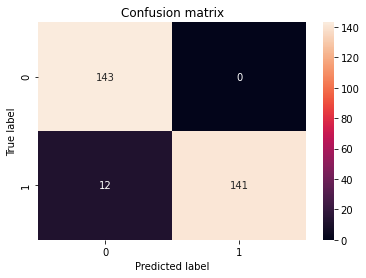

In [0]:
#confusion matrix
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.xlim(0,2)
plt.ylim(2,0)
plt.show()

In [0]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_expected, y_pred.round()))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       143
           1       1.00      0.92      0.96       153

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



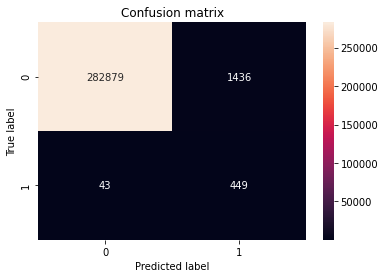

In [0]:
#confusion matrix for whole dataset
y_predict = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_predict.round())
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.xlim(0,2)
plt.ylim(2,0)
plt.show()

In [0]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_expected, y_predict.round()))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.24      0.91      0.38       492

    accuracy                           0.99    284807
   macro avg       0.62      0.95      0.69    284807
weighted avg       1.00      0.99      1.00    284807



### Oversampling with SMOTE (synthetic minority oversampling technique)

In [0]:
%%bash
pip install -U imbalanced-learn

  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [0]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [0]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Train on 398041 samples
Epoch 1/5
398041/398041 [==============================] - 64s 160us/sample - loss: 0.0288 - accuracy: 0.9905
Epoch 2/5
398041/398041 [==============================] - 62s 157us/sample - loss: 0.0136 - accuracy: 0.9962
Epoch 3/5
398041/398041 [==============================] - 55s 137us/sample - loss: 0.0107 - accuracy: 0.9973
Epoch 4/5
398041/398041 [==============================] - 62s 155us/sample - loss: 0.0089 - accuracy: 0.9978
Epoch 5/5
398041/398041 [==============================] - 57s 144us/sample - loss: 0.0085 - accuracy: 0.9981


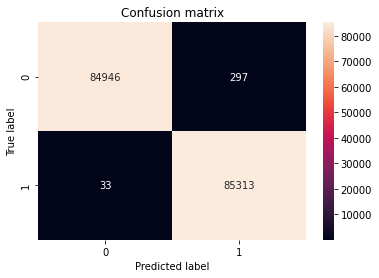

In [0]:
#confusion matrix
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.xlim(0,2)
plt.ylim(2,0)
plt.show()

In [0]:
#classification report
print(classification_report(y_expected, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85243
           1       1.00      1.00      1.00     85346

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



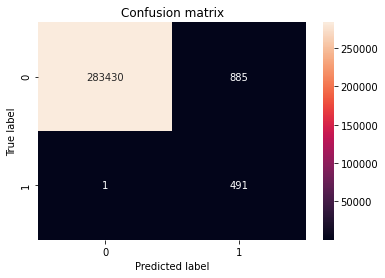

In [0]:
#confusion matrix for whole dataset
y_predict = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_predict.round())
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.xlim(0,2)
plt.ylim(2,0)
plt.show()

In [0]:
#classification report
print(classification_report(y_expected, y_predict.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.36      1.00      0.53       492

    accuracy                           1.00    284807
   macro avg       0.68      1.00      0.76    284807
weighted avg       1.00      1.00      1.00    284807



From all the differnet techniques used above, the SMOTE seems to be more appropriate technique to implement into this specific dataset.